import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import drive

In [ ]:
# Load Data from Google Drive
csv_path = "/content/drive/MyDrive/REDES NEURONALES/portfolio_data.csv"
df = pd.read_csv(csv_path)

# Preprocessing for Multiple Stocks
stocks = ['AMZN', 'DPZ', 'BTC', 'NFLX']

stock_data = df[['Date'] + stocks]
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

scaler = MinMaxScaler()
stock_data[stocks] = scaler.fit_transform(stock_data[stocks])


In [ ]:
# Split data into training and testing sets
train_size = int(0.8 * len(stock_data))
train_data = stock_data.iloc[:train_size]
test_data = stock_data.iloc[train_size:]


In [ ]:
# Create Sequences
sequence_length = 10
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[stocks].values[i : i + sequence_length])
        y.append(data[stocks].values[i + sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [ ]:
# Build and Train LSTM Model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, len(stocks))))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=len(stocks)))  # Output layer for multiple stocks

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 8s 37ms/step - loss: 0.0278
Epoch 2/50
38/38 [==============================] - 2s 42ms/step - loss: 0.0038
Epoch 3/50
38/38 [==============================] - 2s 41ms/step - loss: 0.0012
Epoch 4/50
38/38 [==============================] - 1s 19ms/step - loss: 8.4763e-04
Epoch 5/50
38/38 [==============================] - 1s 20ms/step - loss: 7.5678e-04
Epoch 6/50
38/38 [==============================] - 1s 13ms/step - loss: 6.6140e-04
Epoch 7/50
38/38 [==============================] - 0s 13ms/step - loss: 5.7488e-04
Epoch 8/50
38/38 [==============================] - 1s 13ms/step - loss: 5.6705e-04
Epoch 9/50
38/38 [==============================] - 0s 12ms/step - loss: 5.1797e-04
Epoch 10/50
38/38 [==============================] - 0s 12ms/step - loss: 5.4972e-04
Epoch 11/50
38/38 [==============================] - 0s 13ms/step - loss: 4.5923e-04
Epoch 12/50
38/38 [==============================] - 1s 14ms/step - loss: 4.3890e-04
E

In [ ]:
# Make Predictions
predicted_scaled = model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)

10/10 [==============================] - 0s 5ms/step


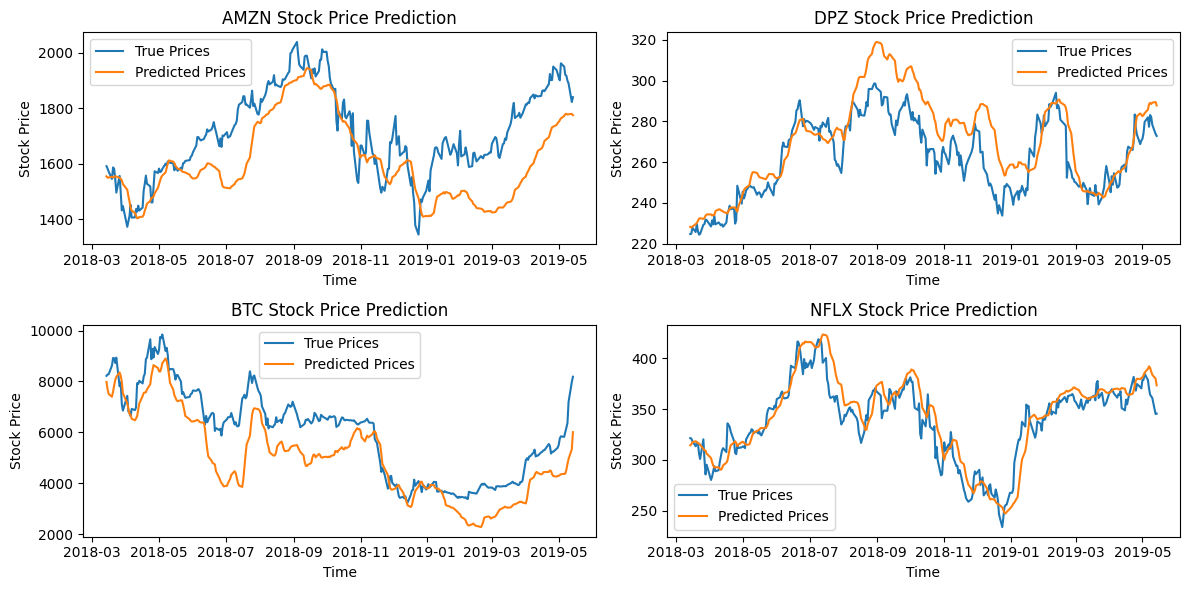

In [ ]:
plt.figure(figsize=(12, 6))

for i, stock in enumerate(stocks):
    plt.subplot(2, 2, i+1)

    true_values = scaler.inverse_transform(test_data[stocks].values[sequence_length:])

    plt.plot(test_data['Date'][sequence_length:], true_values[:, i], label='True Prices')
    plt.plot(test_data['Date'][sequence_length:], predicted[:, i], label='Predicted Prices')
    plt.legend()
    plt.title(f'{stock} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(true_values, predicted)
print("Mean Squared Error:", mse)


Mean Squared Error: 347612.4515067109


In [ ]:
true_values[:10]

array([[1591.      ,  224.674088, 8217.700195,  321.549988],
       [1582.319946,  224.832687, 8268.410156,  321.089996],
       [1571.680054,  227.776627, 8283.230469,  318.450012],
       [1544.930054,  225.675217, 8623.139648,  313.480011],
       [1586.51001 ,  229.560883, 8920.709961,  317.5     ],
       [1581.859985,  226.260056, 8911.349609,  316.480011],
       [1544.920044,  224.416351, 8724.980469,  306.700012],
       [1495.560059,  224.664139, 8934.799805,  300.940002],
       [1555.859985,  229.253601, 7808.47998 ,  320.350006],
       [1497.050049,  229.550964, 7959.779785,  300.690002]])

In [ ]:
predicted[:10]

array([[1554.2904 ,  228.21136, 7982.0312 ,  314.4531 ],
       [1549.5055 ,  227.87936, 7689.0557 ,  315.43942],
       [1549.679  ,  228.35419, 7505.591  ,  317.44794],
       [1553.0317 ,  229.54095, 7398.3135 ,  318.50867],
       [1550.1627 ,  230.09438, 7591.3696 ,  317.4916 ],
       [1552.5374 ,  231.12614, 7836.6445 ,  316.59   ],
       [1554.859  ,  232.17119, 8053.632  ,  316.42673],
       [1553.399  ,  232.46017, 8186.5    ,  314.94617],
       [1549.0248 ,  232.11102, 8349.021  ,  310.82675],
       [1545.9043 ,  232.58197, 8221.467  ,  309.61255]], dtype=float32)